In [13]:
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Statistics
using Distributions 
using IntervalSets

using HCubature
using JLD2
using CPUTime
using KDTree
using LaTeXStrings
using SpecialFunctions

using PyPlot
using BATPar
using BAT
using KDTree
plt = PyPlot

include("plotting recipes.jl")

corner_plots (generic function with 6 methods)

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
JLD2.@load "Generated_Data/test-2.jld" samples_ps

1-element Array{Symbol,1}:
 :samples_ps

In [4]:
smpl_par = hcat(samples_ps.samples...)
x = smpl_par[1,:]
y = smpl_par[2,:]
w_o = samples_ps.weights_o
w_r =  samples_ps.weights_r;


In [5]:
[sum(samples_ps.integrals), sqrt(sum((samples_ps.uncertainty).^2))]

2-element Array{Float64,1}:
 1.118122727180973
 0.00244886523594947

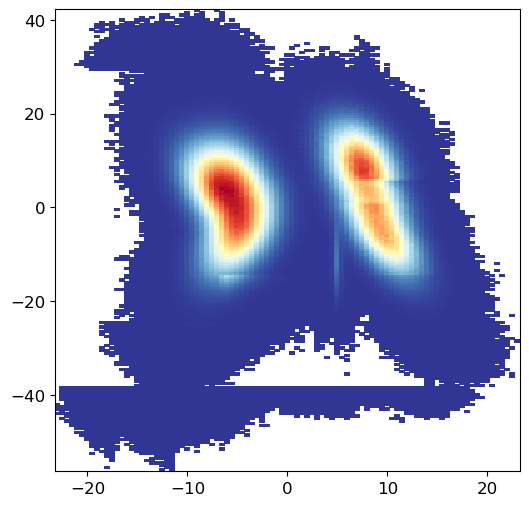

PyObject <matplotlib.collections.QuadMesh object at 0x158a471d0>

In [6]:
histogram_2D_r = fit(Histogram, (x,y), weights(w_r), nbins=200)
histogram_2D_r = normalize(histogram_2D_r, mode=:probability)

fig, ax = plt.subplots(1,1, figsize=(6, 6))

img = ax.pcolormesh(midpoints(histogram_2D_r.edges[1]), midpoints(histogram_2D_r.edges[2]), replace(histogram_2D_r.weights', 0=>NaN), cmap="RdYlBu_r") #terrain_r  vmin = -0.0001, vmax=maximum_v,

# fig.colorbar(img)

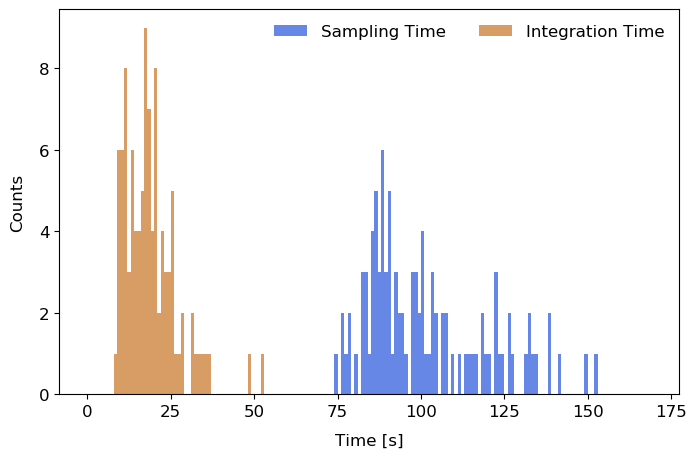

PyObject Text(25.000000000000004, 0.5, 'Counts')

In [14]:
plot_time_histogram(samples_ps)

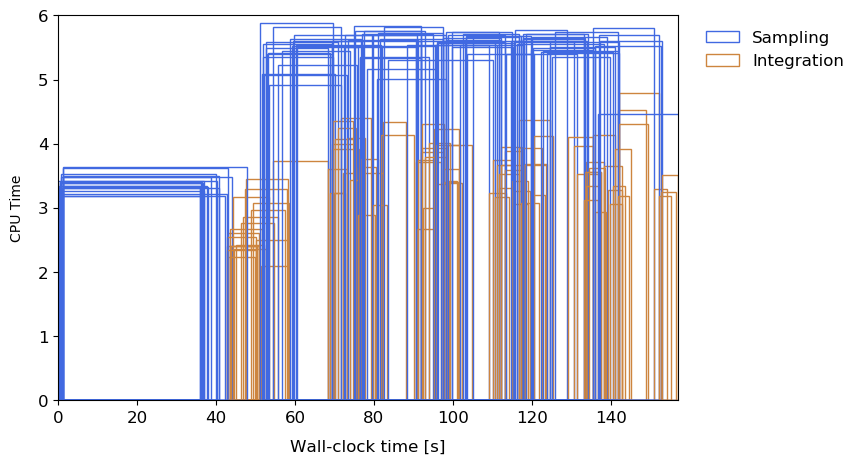

PyObject Text(0.5, 25.000000000000004, 'Wall-clock time [s]')

In [15]:
plot_overlapped_timeline(samples_ps)

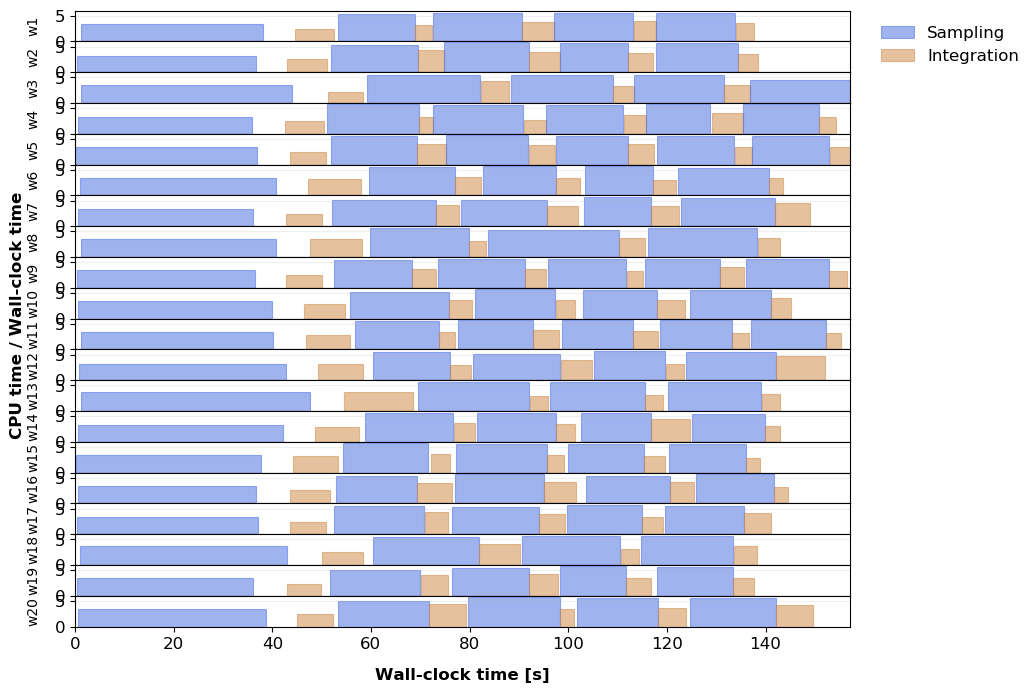

PyObject Text(0.5, 25.00000000000001, 'Wall-clock time [s]')

In [16]:
plot_separated_timeline(samples_ps)

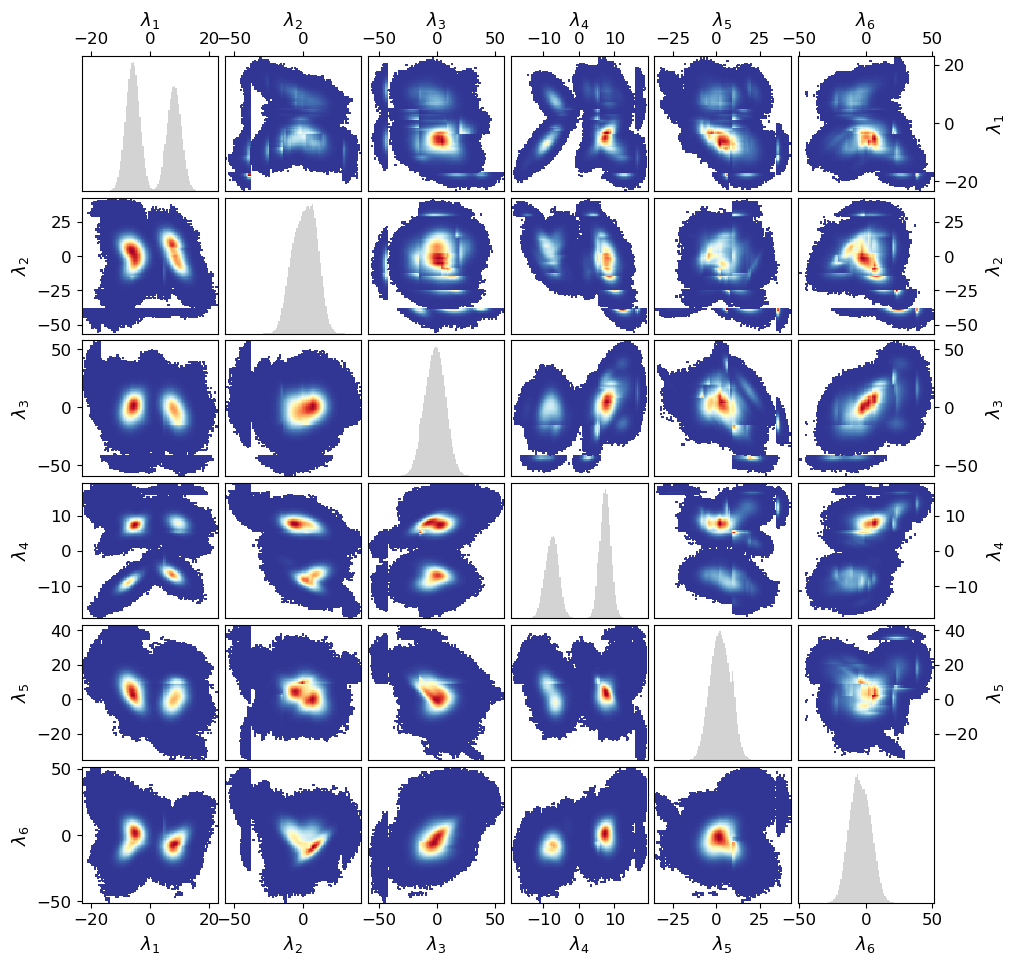

In [18]:
corner_plots(smpl_par, w_r, w_o, 
    [1,2,3,4,5,6], [L"\lambda_1", L"\lambda_2", L"\lambda_3", L"\lambda_4",  L"\lambda_5", L"\lambda_6"], 
    N_bins=100, linewidth=0.6, color="black",
    )